## PLSLOGIT - breast dataset

In [1]:
#disable warnings
from warnings import simplefilter, filterwarnings
simplefilter(action='ignore', category=FutureWarning)
filterwarnings("ignore")

### breast dataset

In [2]:
#alcools dataset
from discrimintools.datasets import load_dataset
D = load_dataset("breast")
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ucellsize  699 non-null    int64 
 1   normnucl   699 non-null    int64 
 2   mitoses    699 non-null    int64 
 3   Class      699 non-null    object
dtypes: int64(3), object(1)
memory usage: 22.0+ KB


In [3]:
#split into X and y
y, X = D["Class"], D.drop(columns=["Class"])

### Instanciation and training

In [4]:
#instanciation and training
from discrimintools import PLSLOGIT
clf = PLSLOGIT()
clf.fit(X,y)

Optimization terminated successfully.
         Current function value: 0.181262
         Iterations 8


,n_components,2
,scale,True
,classes,None
,max_iter,500
,tol,1e-10
,var_select,False
,threshold,1.0
,multi_class,None
,warn_message,True


### Canonical coefficients

In [5]:
#canonical coefficients
cancoef = clf.cancoef_
cancoef._fields

('standardized', 'raw')

#### Standardized canonical coefficients

In [6]:
#standardized canonical coefficients
print(cancoef.standardized)

               Can1      Can2
ucellsize  0.640964 -0.388665
normnucl   0.623278 -0.121004
mitoses    0.463204  0.954876


#### Raw canonical coefficients

In [7]:
#raw canonical coefficients
print(cancoef.raw)

               Can1      Can2
Constant  -1.672841 -0.372066
ucellsize  0.210051 -0.127370
normnucl   0.204110 -0.039626
mitoses    0.270077  0.556754


### Coefficients

In [8]:
#coefficients
coef = clf.coef_
coef._fields

('standardized', 'raw')

#### Standardized coefficients

In [9]:
#standardized coefficients
print(coef.standardized.to_frame())

           positive
const     -0.335260
ucellsize  2.319484
normnucl   2.058202
mitoses    0.727368


#### Raw coefficients

In [10]:
#raw coefficients
print(coef.raw)

Constant    -5.324298
ucellsize    0.760123
normnucl     0.674017
mitoses      0.424102
Name: positive, dtype: float64


#### Summary

In [11]:
#summary
from discrimintools import summaryPLSLOGIT
summaryPLSLOGIT(clf,detailed=True)

                     Partial Least Squares Logistic Regression - Results                     

Class Level Information:
          Frequency  Proportion  Prior Probability
negative        458      0.6552             0.6552
positive        241      0.3448             0.3448

Importance of PLS components:
      Proportion (%)  Cumulative (%)
Can1         69.1520         69.1520
Can2         20.1981         89.3501

Raw Canonical Coefficients:
             Can1    Can2
Constant  -1.6728 -0.3721
ucellsize  0.2101 -0.1274
normnucl   0.2041 -0.0396
mitoses    0.2701  0.5568

PLS Logistic Regression Coefficients:
           positive
Constant    -5.3243
ucellsize    0.7601
normnucl     0.6740
mitoses      0.4241

Classification Summary for Calibration Data:

Observation Profile:
                        Read  Used
Number of Observations   699   699

Number of Observations Classified into Class:
prediction  negative  positive  Total
Class                                
negative         441      

### Plotting

In [12]:
#plotting
from discrimintools import fviz_plsr

#### Graph of individuals

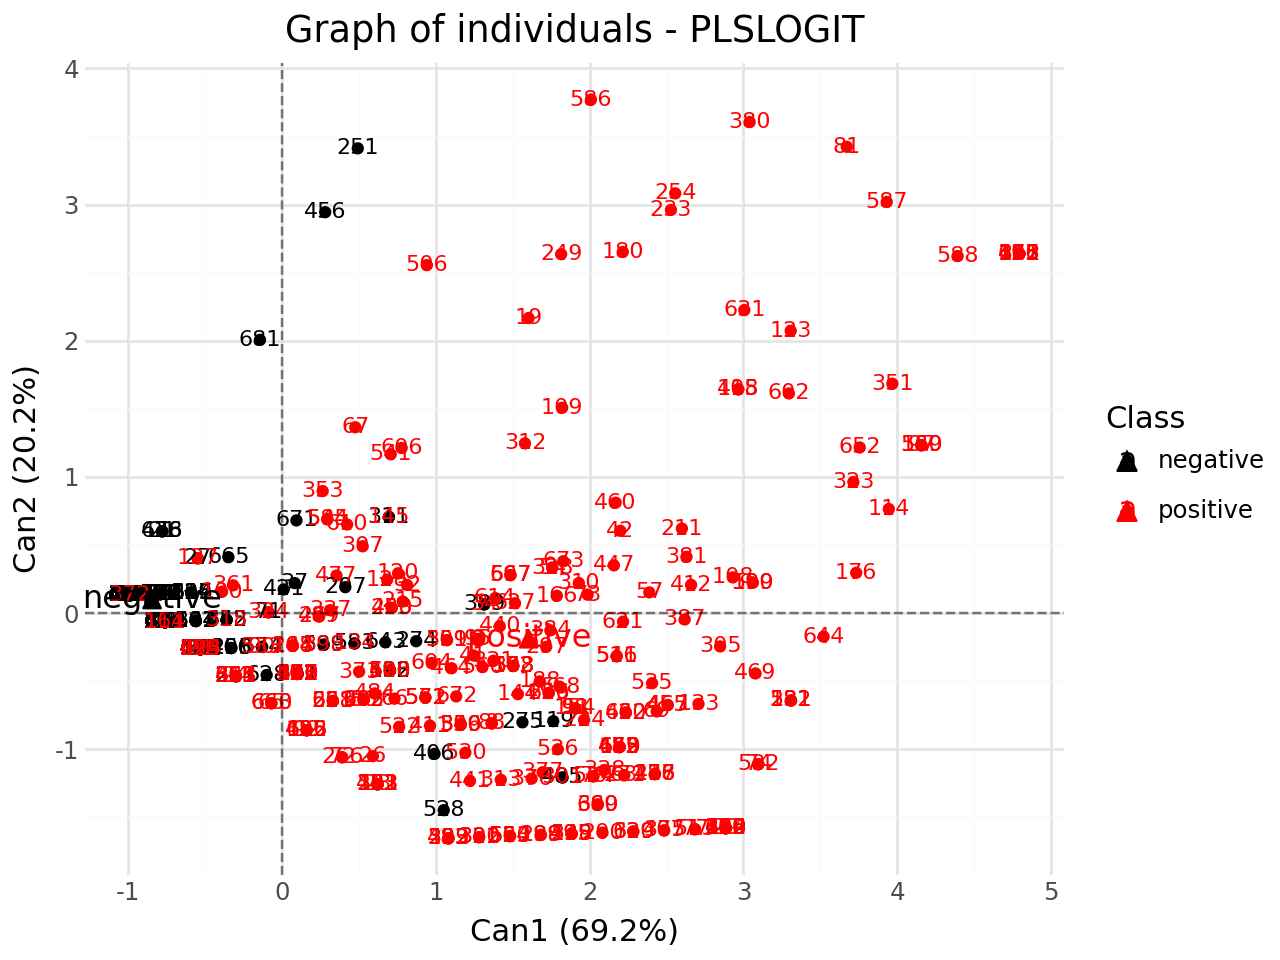

In [13]:
#graph of individuals
p = fviz_plsr(clf,element="ind",repel=False)
p.show()

#### Graph of variables

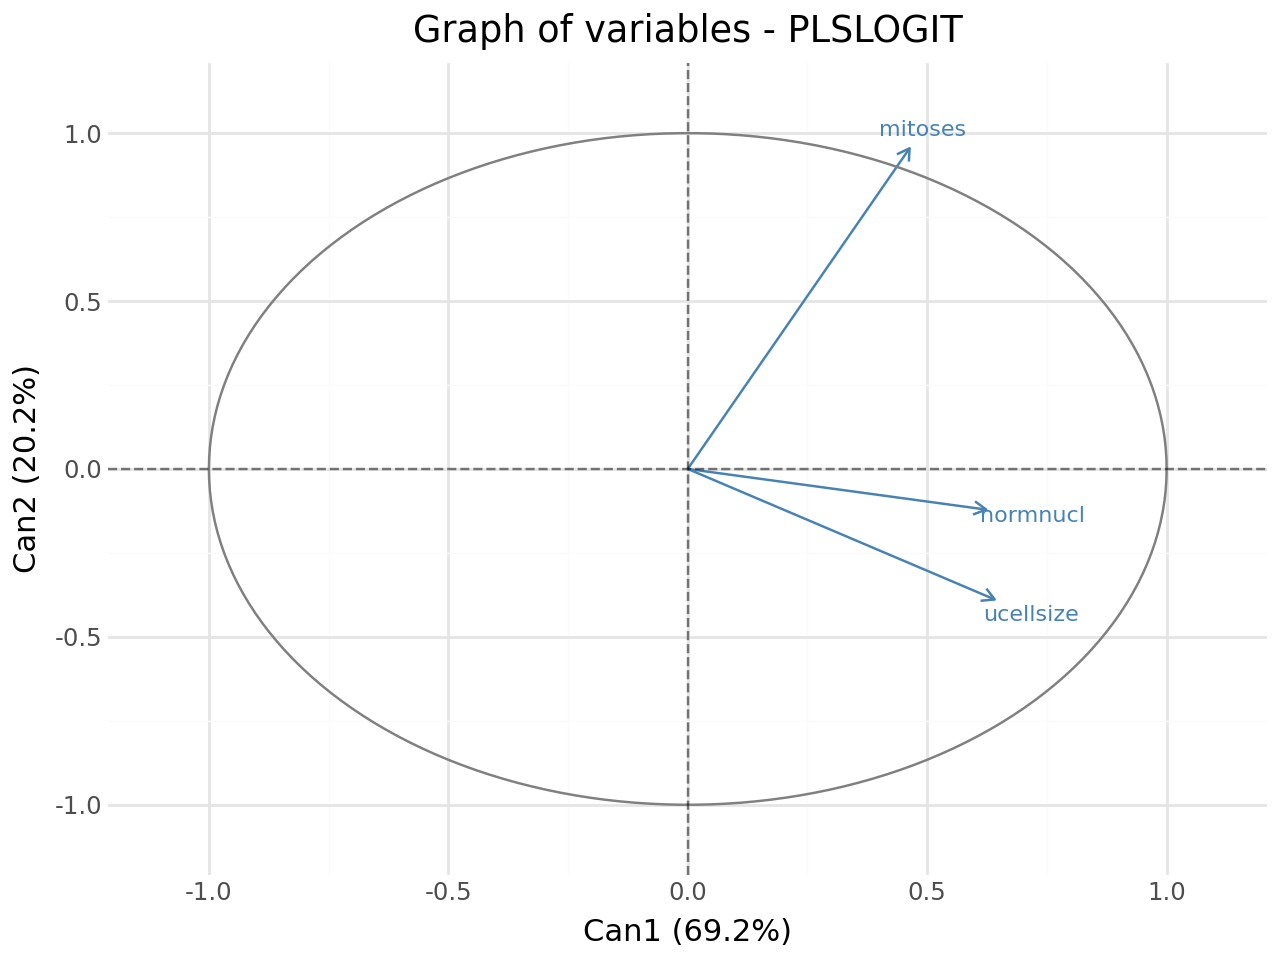

In [14]:
#graph of variables
p = fviz_plsr(clf,element="var",repel=True)
p.show()

#### Distance between barycenter

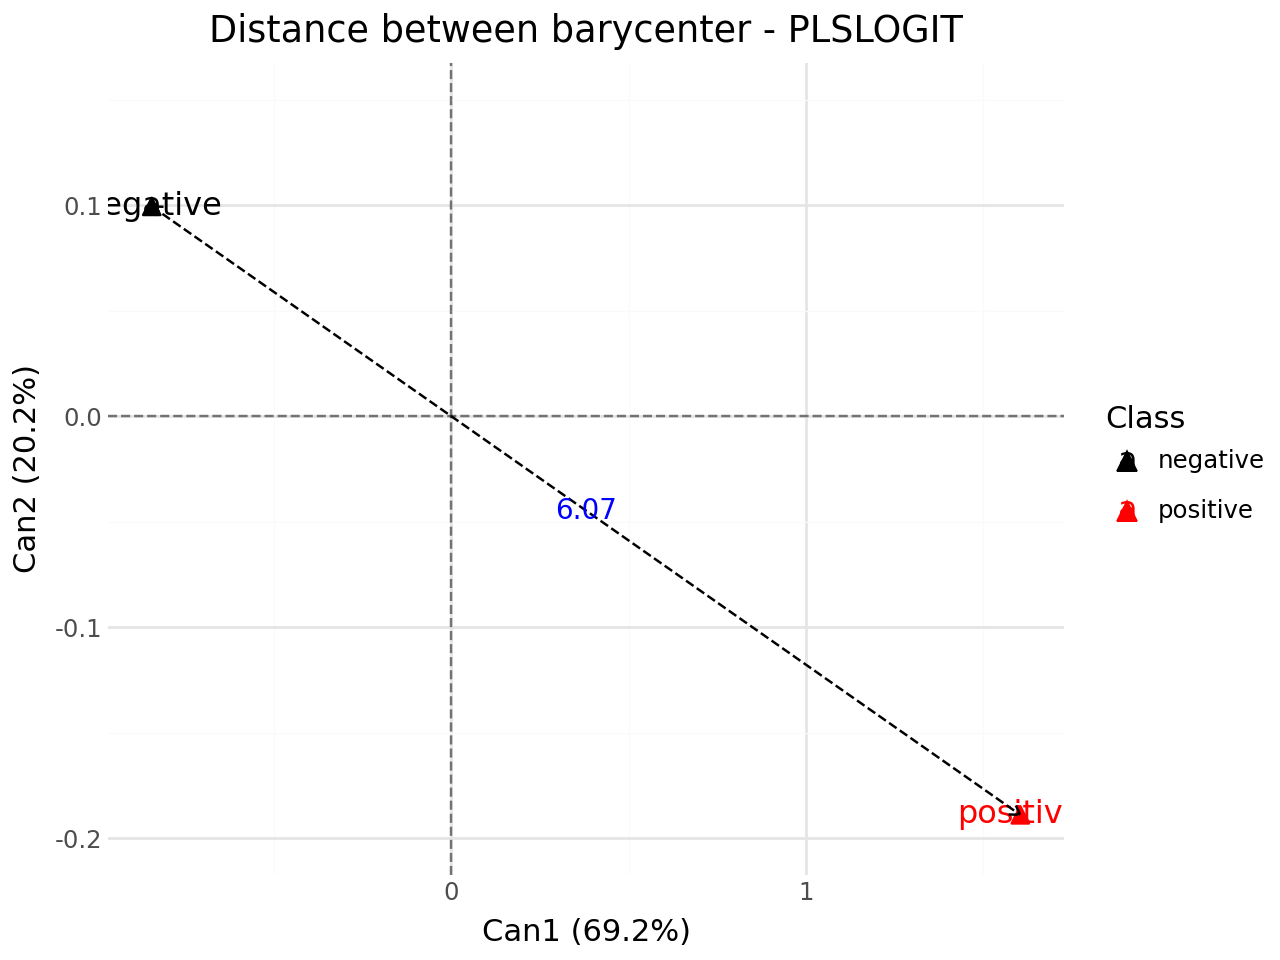

In [15]:
#distance between barycenter
p = fviz_plsr(clf,element="dist",repel=False,y_lim=(-0.2,0.15))
p.show()